## This is an implementation of Support Vector Machines

In [1]:
from sklearn.datasets  import load_breast_cancer

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC


In [3]:
X,y=load_breast_cancer(return_X_y=True)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
model=SVC(kernel='linear') #'linear','poly','rbf' - how to know ?=>plot the graph between the data points and target and see their distribution
# if still you have confusion then do hyperparameter tuning - put all the kernels in a dictionary and use grid search cv and check which one works best
# then use the best kernel
model.fit(X_train,y_train)

SVC(kernel='linear')

In [8]:
y_pred=model.predict(X_test)

In [9]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,y_pred)

In [10]:
acc

0.956140350877193

**We are getting an accuracy of `95.61` percent**

### Plotting the decision boundary

In [ ]:
X_vis=X[:,:2]


SVC(kernel='linear')

In [22]:
X_vis

array([[17.99, 10.38],
       [20.57, 17.77],
       [19.69, 21.25],
       ...,
       [16.6 , 28.08],
       [20.6 , 29.33],
       [ 7.76, 24.54]])

Plot in 2-D

This is a plot of our data before any model is applied on it 

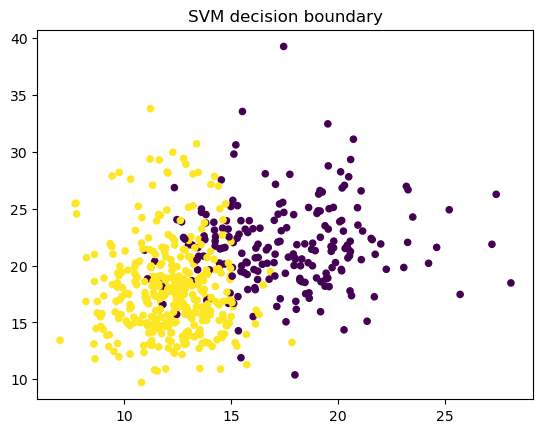

In [13]:
from matplotlib import pyplot as plt
plt.scatter(X_vis[:,0],X_vis[:,1],c=y,s=20)
plt.title("SVM decision boundary")
plt.show()

Further Tasks:
1. hyperparameter tuning
2. plot the decision boundary
3. plot the decision boundary in 3-D
4. SVM on multiclass classification[sklearn.datasets.load_digits()]


Now split the data into train and test and fit the SVM model to the train data

In [30]:

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_vis, y, test_size=0.3, random_state=42)

# Train model
svm_vis = SVC(kernel="linear")
svm_vis.fit(X_train, y_train)


SVC(kernel='linear')

Make the predictions on the test data

In [31]:
y_pred_vis = svm_vis.predict(X_test)    

Check the accuracy score of the predictions

In [41]:
acc=accuracy_score(y_test,y_pred_vis)
acc

0.9064327485380117

Now plot the scatter plot of the test data with the predictions made by SVM

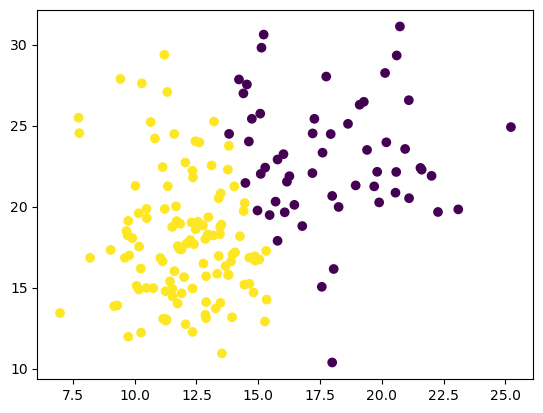

In [35]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_vis)
plt.show()


To Visualize the decision boundary: we will have to create a meshgrid. Then we will plot the decision boundary and the train and test points.

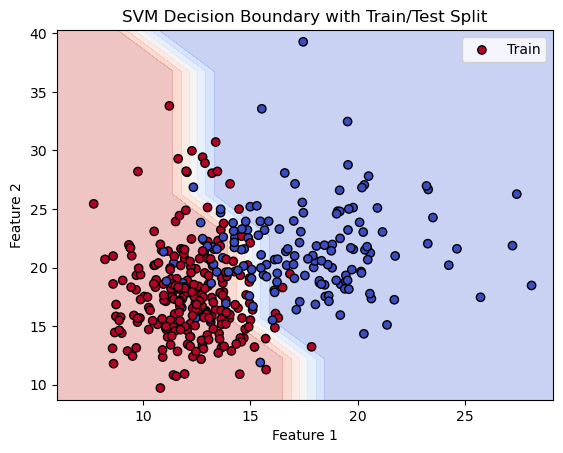

In [39]:

# Create meshgrid for decision boundary
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 10),
                     np.linspace(y_min, y_max, 10))

Z = svm_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

# # Plot train points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k', label="Train")

# # Plot test points (different marker)
# plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.coolwarm, marker="x", s=100, label="Test")

# # Plot support vectors
# plt.scatter(svm_vis.support_vectors_[:, 0],
#             svm_vis.support_vectors_[:, 1],
#             s=100, facecolors='none', edgecolors='k', linewidth=1.5, label="Support Vectors")

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("SVM Decision Boundary with Train/Test Split")
plt.legend()
plt.show()

To viaualize the support vectors 

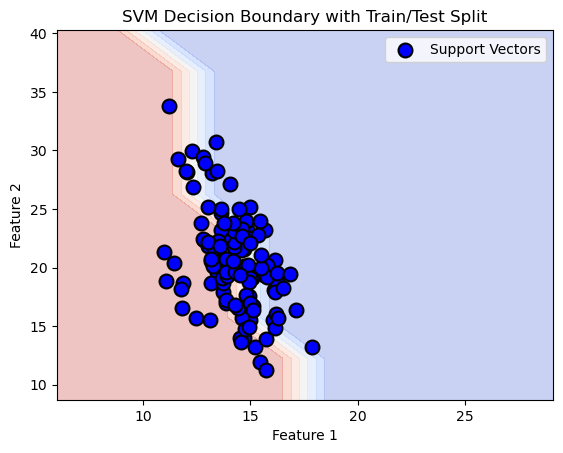

In [ ]:

# Plot support vectors
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

plt.scatter(svm_vis.support_vectors_[:, 0],
            svm_vis.support_vectors_[:, 1],
            s=100,facecolors='blue', edgecolors='k',  linewidth=1.5, label="Support Vectors")

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("SVM Decision Boundary with Train/Test Split")
plt.legend()
plt.show()